# Analysing Global Power Plant Database (Puerto Rico)

In [1]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn-pastel")

# Plotting geographical data
import folium
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Total power plants in Puerto Rico
df_power_plants = pd.read_csv('../input/ds4g-environmental-insights-explorer/eie_data/gppd/gppd_120_pr.csv')
df_power_plants.head().T

,0,1,2,3,4
system:index,0000000000000000315a,000000000000000026e5,00000000000000002fda,00000000000000003f76,00000000000000002def
capacity_mw,15,1492,990,602,10
commissioning_year,1942,1975,1962,1960,1915
country,USA,USA,USA,USA,USA
country_long,United States of America,United States of America,United States of America,United States of America,United States of America
estimated_generation_gwh,685.398,8334.01,5529.94,3362.65,456.932
generation_gwh_2013,0,0,0,0,0
generation_gwh_2014,0,0,0,0,0
generation_gwh_2015,0,0,0,0,0
generation_gwh_2016,0,0,0,0,0


In [3]:
lat_lng = df_power_plants[".geo"].apply(lambda x: pd.read_json(x)["coordinates"])
df_power_plants = df_power_plants.assign(lat=lat_lng[1],lng=lat_lng[0])

## Remove irrelevants columns


All columns with a single unique value are removed

In [4]:
remove_col = []
for colname,col_serie in df_power_plants.iteritems():
    if len(col_serie.unique())== 1:
        remove_col.append(colname)
        
df_power_plants.drop(columns=remove_col,inplace=True)
print("Removed columns: {}\n".format(", ".join(remove_col)))
print("Final columns: {}".format(", ".join(df_power_plants.columns)))

Removed columns: country, country_long, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, geolocation_source, other_fuel1, other_fuel2, other_fuel3, year_of_capacity_data

Final columns: system:index, capacity_mw, commissioning_year, estimated_generation_gwh, gppd_idnr, name, owner, primary_fuel, source, url, wepp_id, .geo, lat, lng


## Columns

### system:index
Unique plant-level ID




In [5]:
df_power_plants.shape[0] == df_power_plants["system:index"].unique().shape[0]

True

In [6]:
df_power_plants["system:index"].unique().shape[0] == df_power_plants["system:index"].apply(lambda x: x[-3:]).unique().shape[0]

True

In [7]:
df_power_plants["name_id"] = df_power_plants["name"] + "_" + df_power_plants["system:index"].apply(lambda x: x[-3:])


### capacity_mw

Electrical generating capacity in megawatts. Is the maximum electric output an electricity generator can produce under specific conditions. Nameplate generator capacity is determined by the generator's manufacturer and indicates the maximum output of electricity a generator can produce without exceeding design limits.

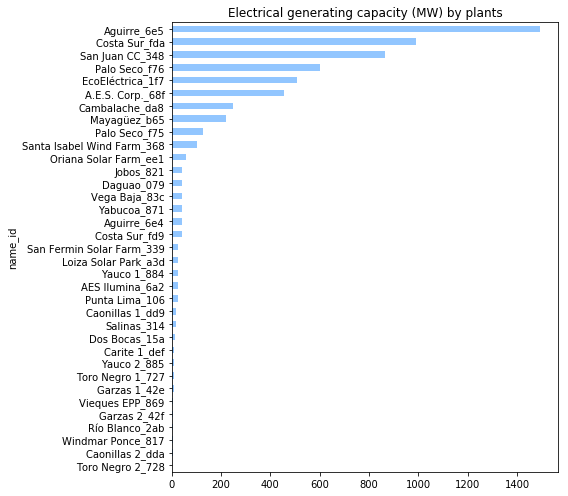

In [8]:
plt.figure(figsize=(8,7))
plt.title("Electrical generating capacity (MW) by plants")
df_power_plants.groupby(["name_id"]).mean()["capacity_mw"].sort_values().plot(kind="barh")
plt.tight_layout()

## estimated_generation_gwh

Estimated annual electricity generation in gigawatt-hours

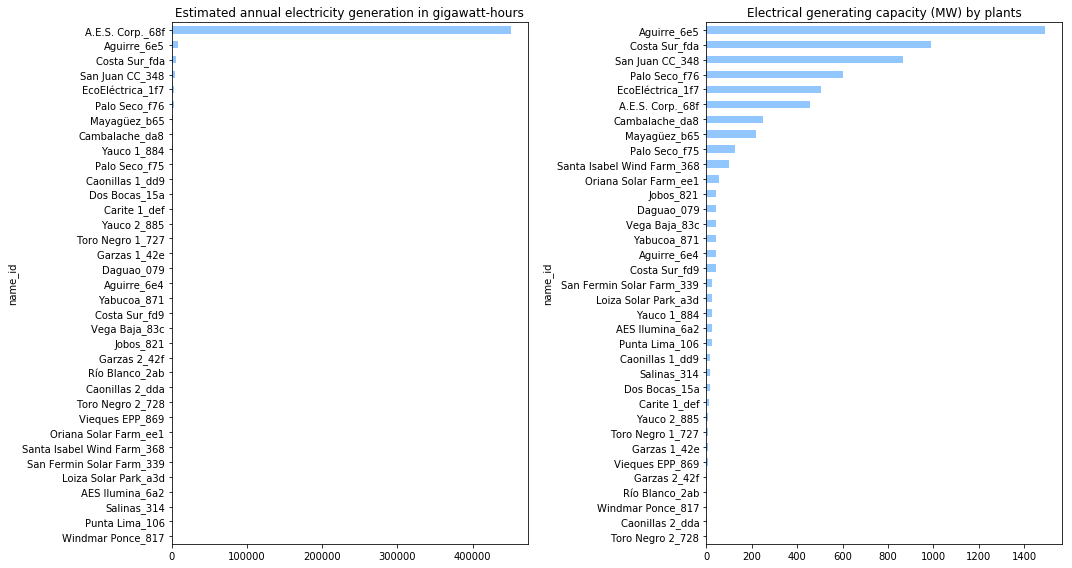

In [9]:
plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1)
plt.title("Estimated annual electricity generation in gigawatt-hours")
df_power_plants.groupby(["name_id"]).mean()["estimated_generation_gwh"].sort_values().plot(kind="barh",ax=ax)

ax = plt.subplot(1,2,2)
plt.title("Electrical generating capacity (MW) by plants")
df_power_plants.groupby(["name_id"]).mean()["capacity_mw"].sort_values().plot(kind="barh",ax=ax)
plt.tight_layout()

### Primary_fuel

Energy source used in primary electricity generation or export

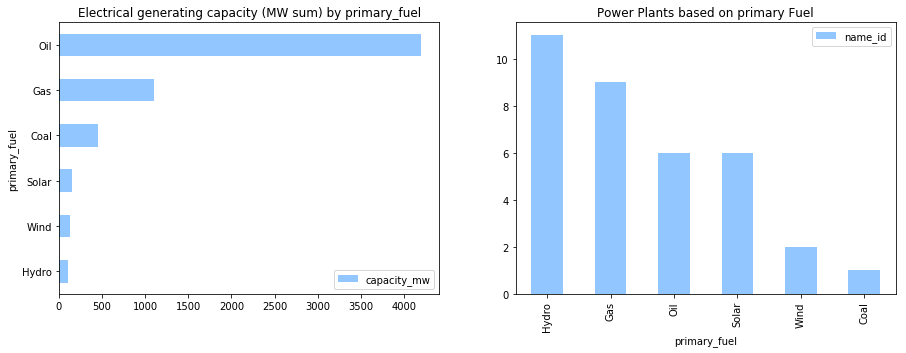

In [10]:
plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
df_power_plants.groupby(["primary_fuel"])[["capacity_mw"]].sum().sort_values(by="capacity_mw").plot(kind="barh",ax=ax);
plt.title("Electrical generating capacity (MW sum) by primary_fuel");

ax = plt.subplot(1,2,2)
df_power_plants.groupby(["primary_fuel"])[["name_id"]].count().sort_values(by="name_id", ascending=False).plot(kind="bar",ax=ax);
plt.title("Power Plants based on primary Fuel");

### gppd_idnr
10- or 12-character identifier for the power plant

In [11]:
df_power_plants.shape[0] == df_power_plants["gppd_idnr"].unique().shape[0]

True

### Commissioning_year

Year of plant operation, weighted by unit-capacity when data is available

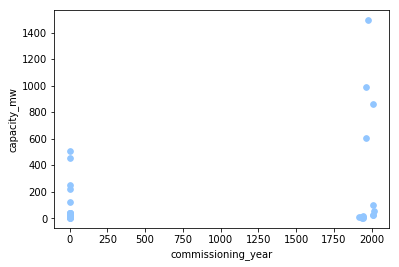

In [12]:
df_power_plants[["commissioning_year","capacity_mw"]].sort_values(by="commissioning_year").plot(kind="scatter",x="commissioning_year",y="capacity_mw",s=32)

### Owner
	
Majority shareholder of the power plant, generally in Romanized form

In [13]:
print(df_power_plants["owner"].unique())
df_power_plants.groupby("owner").count()["name_id"].sort_values()

['PREPA' nan 'Gas Natural Fenosa  International Power' 'AES Corporation'
 'Sonnedix' 'Windmar Renewable Energy' 'Sovereign Bank'
 'Uriel Renewables and Coqui Power' 'Pattern Energy']


owner
Gas Natural Fenosa  International Power     1
Pattern Energy                              1
Sovereign Bank                              1
Uriel Renewables and Coqui Power            1
Windmar Renewable Energy                    1
AES Corporation                             2
Sonnedix                                    2
PREPA                                      13
Name: name_id, dtype: int64

Estimated generation sum (GWH) by owner
owner
AES Corporation                            0.925466
Gas Natural Fenosa  International Power    0.007337
PREPA                                      0.053935
Pattern Energy                             0.000037
Sonnedix                                   0.000067
Sovereign Bank                             0.000009
Uriel Renewables and Coqui Power           0.000024
Windmar Renewable Energy                   0.000004
Name: estimated_generation_gwh, dtype: float64


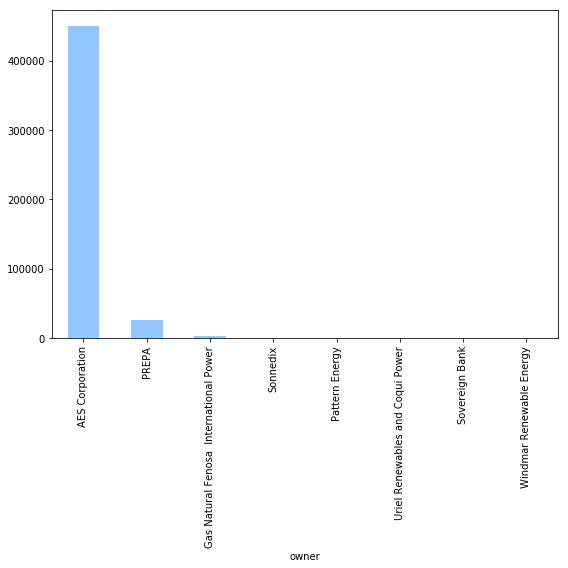

In [14]:
plt.figure(figsize=(8,8))
df_power_plants.groupby("owner").sum()["estimated_generation_gwh"].sort_values(ascending=False).plot(kind="bar")
plt.tight_layout()

print("Estimated generation sum (GWH) by owner")
print(df_power_plants.groupby("owner").sum()["estimated_generation_gwh"]/df_power_plants["estimated_generation_gwh"].sum())


### Geographical analysis

In [15]:
def addpoint(lat,lng,data,scale=10,var_circle="capacity_mw"):
    folium.Marker(
    location=[lat, lng],
    popup=pd.DataFrame(data).to_html(),
    icon=folium.Icon(icon='bolt',color='black',icon_color="yellow",prefix="fa")
    ).add_to(m)
    
    folium.CircleMarker(
    location=[lat, lng],
    radius=data[var_circle]/scale,
    color='red',
    fill=True,
    fill_color='red'
    ).add_to(m)
    
    
m = folium.Map(tiles="cartodbpositron",
    location=[18.245497, -66.524216],
            zoom_start=9)

df_power_plants.apply(lambda x: addpoint(x.lat,x.lng,x),axis=1 )
print("Capacity_mw")

m

Capacity_mw


In [16]:
 m = folium.Map(tiles="cartodbpositron",
    location=[18.245497, -66.524216],
            zoom_start=9)

df_power_plants.apply(lambda x: addpoint(x.lat,x.lng,x,1000,"estimated_generation_gwh"),axis=1 )
print("estimated_generation_gwh")

m

estimated_generation_gwh
